In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [18]:
stock_data = yf.download('AAPL', start='2020-03-11', end='2025-03-11')
data = stock_data['Close'].values.reshape(-1, 1)

[*********************100%***********************]  1 of 1 completed


In [19]:
print(stock_data[:5])


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-03-11  66.841072  68.246186  65.974706  67.316728  255598800
2020-03-12  60.240215  65.523339  60.184400  62.111272  418474000
2020-03-13  67.457489  67.930716  61.385659  64.283251  370732000
2020-03-16  58.779282  62.873271  58.242959  58.716183  322423600
2020-03-17  61.363811  62.516533  57.854672  60.065477  324056000


In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [4]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [5]:
seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

In [6]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [7]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='adam', loss='mse')

In [9]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - loss: 0.0816 - val_loss: 0.0242
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0042 - val_loss: 0.0081
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 9.5111e-04 - val_loss: 8.0400e-04
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 7.9684e-04 - val_loss: 7.2337e-04
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 7.5560e-04 - val_loss: 7.2595e-04
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 7.3846e-04 - val_loss: 8.5987e-04
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 7.0460e-04 - val_loss: 6.9770e-04
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 6.9678e-04 - val_loss: 7.8846e-04
Epoch 12/50
24/

In [10]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step


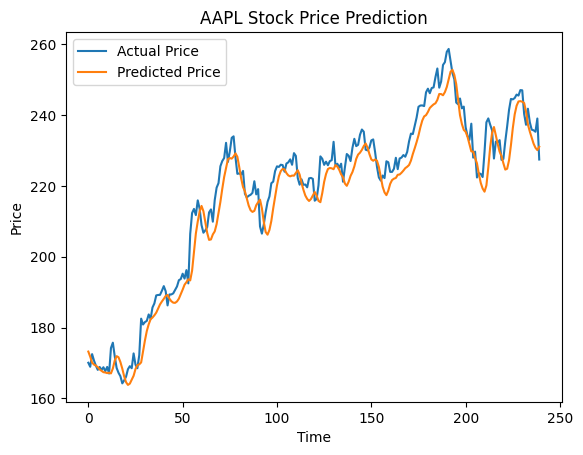

In [11]:
plt.plot(y_test_inv, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [12]:
last_60_days = scaled_data[-seq_length:]
future_predictions = []
for _ in range(30):
    pred = model.predict(last_60_days.reshape(1, seq_length, 1))
    future_predictions.append(pred[0, 0])
    last_60_days = np.append(last_60_days[1:], pred, axis=0)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
print("Predicted prices for next 30 days:", future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━